<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_0_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,29.698374,53.778632,37.409994,-0.202446,130.684554,130.845937,-0.161382
1,0.0,1.0,22.157266,65.301848,91.556964,0.257629,189.273708,189.004255,0.269453
2,0.0,2.0,57.348005,70.151917,47.660037,-0.141927,185.018033,185.136989,-0.118956
3,0.0,3.0,70.060369,52.512838,20.851870,-0.087002,153.338076,153.376561,-0.038485
4,0.0,4.0,88.251634,97.780836,54.201401,0.080414,250.314284,250.237981,0.076303
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,45.349929,51.320609,81.226659,0.119358,188.016556,187.878872,0.137684
119996,999.0,116.0,44.668089,55.344176,88.731618,0.137342,198.881225,198.730202,0.151024
119997,999.0,117.0,60.734316,48.103144,35.995997,-0.098629,154.734828,154.792986,-0.058158
119998,999.0,118.0,37.074269,53.581979,32.406543,-0.286889,132.775903,133.010688,-0.234785


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    29.698374  53.778632  37.409994 -0.202446  130.684554   
      1.0    22.157266  65.301848  91.556964  0.257629  189.273708   
      2.0    57.348005  70.151917  47.660037 -0.141927  185.018033   
      3.0    70.060369  52.512838  20.851870 -0.087002  153.338076   
      4.0    88.251634  97.780836  54.201401  0.080414  250.314284   
...                ...        ...        ...       ...         ...   
999.0 115.0  45.349929  51.320609  81.226659  0.119358  188.016556   
      116.0  44.668089  55.344176  88.731618  0.137342  198.881225   
      117.0  60.734316  48.103144  35.995997 -0.098629  154.734828   
      118.0  37.074269  53.581979  32.406543 -0.286889  132.775903   
      119.0  32.025390  25.634646  71.259908  0.108878  139.028822   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    130.845937 -0.161382  
      1.0    189.004255  0.269453  
      2.0    185.136989 -0.118956  
      3.0    153.376561 -0.038485  
      4.0    250.237981  0.076303  
...                 ...       ...  
999.0 115.0  187.878872  0.137684  
      116.0  198.730202  0.151024  
      117.0  154.792986 -0.058158  
      118.0  133.010688 -0.234785  
      119.0  138.888441  0.140381  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    29.698374  53.778632  37.409994 -0.202446  130.684554   
      1.0    22.157266  65.301848  91.556964  0.257629  189.273708   
      2.0    57.348005  70.151917  47.660037 -0.141927  185.018033   
      3.0    70.060369  52.512838  20.851870 -0.087002  153.338076   
      4.0    88.251634  97.780836  54.201401  0.080414  250.314284   
...                ...        ...        ...       ...         ...   
999.0 115.0  45.349929  51.320609  81.226659  0.119358  188.016556   
      116.0  44.668089  55.344176  88.731618  0.137342  198.881225   
      117.0  60.734316  48.103144  35.995997 -0.098629  154.734828   
      118.0  37.074269  53.581979  32.406543 -0.286889  132.775903   
      119.0  32.025390  25.634646  71.259908  0.108878  139.028822   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    130.845937 -0.161382  
      1.0    189.004255  0.269453  
      2.0    185.136989 -0.118956  
      3.0    153.376561 -0.038485  
      4.0    250.237981  0.076303  
...                 ...       ...  
999.0 115.0  187.878872  0.137684  
      116.0  198.730202  0.151024  
      117.0  154.792986 -0.058158  
      118.0  133.010688 -0.234785  
      119.0  138.888441  0.140381  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,29.698374,53.778632,37.409994,-0.202446,130.684554,130.845937,-0.161382
1,0.0,1.0,22.157266,65.301848,91.556964,0.257629,189.273708,189.004255,0.269453
2,0.0,2.0,57.348005,70.151917,47.660037,-0.141927,185.018033,185.136989,-0.118956
3,0.0,3.0,70.060369,52.512838,20.851870,-0.087002,153.338076,153.376561,-0.038485
4,0.0,4.0,88.251634,97.780836,54.201401,0.080414,250.314284,250.237981,0.076303
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,45.349929,51.320609,81.226659,0.119358,188.016556,187.878872,0.137684
119996,999.0,116.0,44.668089,55.344176,88.731618,0.137342,198.881225,198.730202,0.151024
119997,999.0,117.0,60.734316,48.103144,35.995997,-0.098629,154.734828,154.792986,-0.058158
119998,999.0,118.0,37.074269,53.581979,32.406543,-0.286889,132.775903,133.010688,-0.234785


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    29.698374  53.778632  37.409994 -0.202446  130.684554   
      1.0    22.157266  65.301848  91.556964  0.257629  189.273708   
      2.0    57.348005  70.151917  47.660037 -0.141927  185.018033   
      3.0    70.060369  52.512838  20.851870 -0.087002  153.338076   
      4.0    88.251634  97.780836  54.201401  0.080414  250.314284   
...                ...        ...        ...       ...         ...   
999.0 115.0  45.349929  51.320609  81.226659  0.119358  188.016556   
      116.0  44.668089  55.344176  88.731618  0.137342  198.881225   
      117.0  60.734316  48.103144  35.995997 -0.098629  154.734828   
      118.0  37.074269  53.581979  32.406543 -0.286889  132.775903   
      119.0  32.025390  25.634646  71.259908  0.108878  139.028822   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    130.845937 -0.161382  
      1.0    189.004255  0.269453  
      2.0    185.136989 -0.118956  
      3.0    153.376561 -0.038485  
      4.0    250.237981  0.076303  
...                 ...       ...  
999.0 115.0  187.878872  0.137684  
      116.0  198.730202  0.151024  
      117.0  154.792986 -0.058158  
      118.0  133.010688 -0.234785  
      119.0  138.888441  0.140381  

[120000 rows x 7 columns]

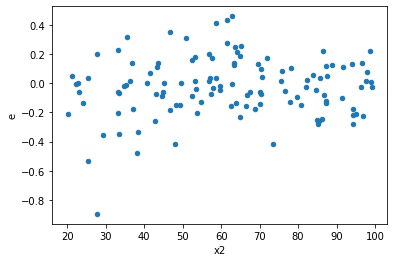

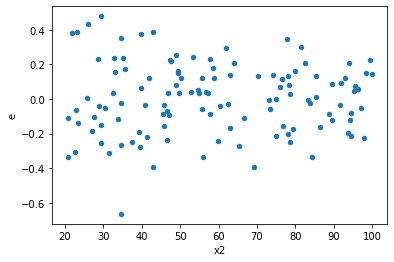

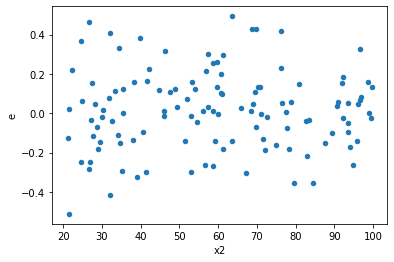

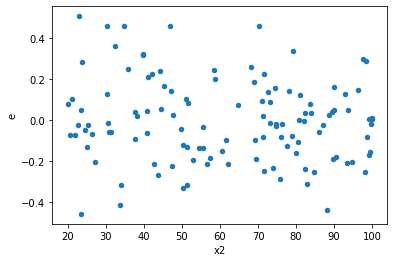

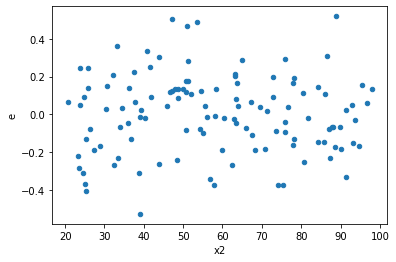

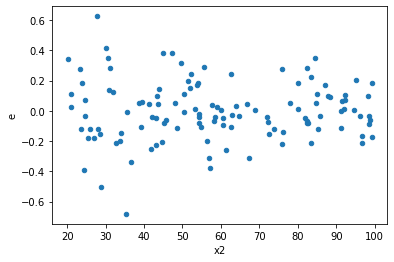

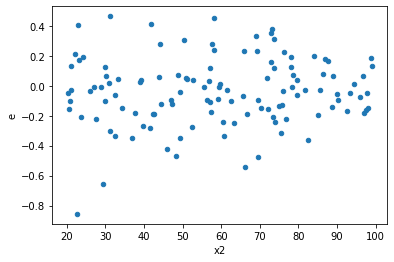

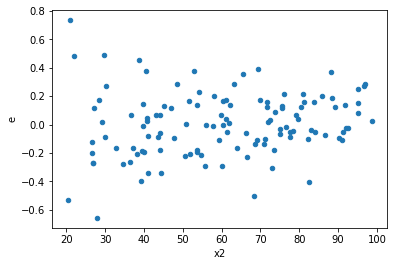

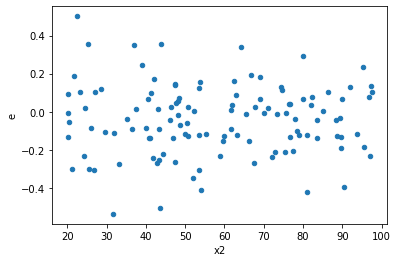

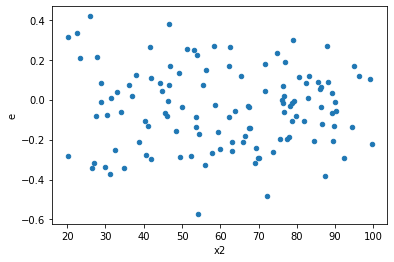

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,49.0,65.0,1.445075599945015,3.1961632077788025,0.029491338774388063,0.049171741658135426,1.6673282292914735,0.05393096437651934,0.9730345178117403,0.02696548218825967,Reject001=1 : Homoscedasticity
4.0,56.0,58.0,2.131315613723613,2.864235656092552,0.038059207387921665,0.04938337338090607,1.297540773184315,0.3272224531317396,0.8363887734341302,0.1636112265658698,Reject001=1 : Homoscedasticity
5.0,50.0,64.0,1.3666289352180778,2.8722082919064578,0.027332578704361555,0.0448782545610384,1.6419326930860358,0.0614990385965688,0.9692504807017156,0.0307495192982844,Reject001=1 : Homoscedasticity
6.0,61.0,53.0,2.291327944150162,3.275990146516381,0.03756275318278954,0.06181113483993172,1.6455432470336673,0.06561189301922488,0.9671940534903876,0.03280594650961244,Reject001=1 : Homoscedasticity
10.0,64.0,50.0,2.2952084634496672,2.003994970756742,0.03586263224140105,0.040079899415134845,1.1175950260802452,0.6871827105556387,0.6564086447221806,0.34359135527781937,Reject001=1 : Homoscedasticity
12.0,43.0,71.0,1.0198815056768107,3.388710472286211,0.023718174550623503,0.0477283165110734,2.0123098600696787,0.008835612170711604,0.9955821939146442,0.004417806085355802,Reject001=0 : Heteroscedasticity
15.0,61.0,53.0,1.9597706536128598,2.2689530389724646,0.03212738776414524,0.04281043469759367,1.33252149262415,0.28703788059174085,0.8564810597041296,0.14351894029587042,Reject001=1 : Homoscedasticity
18.0,62.0,52.0,2.5558118754824224,2.2046683164797916,0.04122277218520036,0.04239746762461138,1.0284962746836506,0.9224457690293526,0.5387771154853237,0.4612228845146763,Reject001=1 : Homoscedasticity
22.0,70.0,44.0,2.0522979949280673,1.5668768821283474,0.029318542784686676,0.03561083823018971,1.2146182875360898,0.49337630336662297,0.7533118483166885,0.24668815168331149,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,49.0,65.0,1.445075599945015,3.1961632077788025,0.029491338774388063,0.049171741658135426,1.6673282292914735,0.05393096437651934,Reject001=1 : Homoscedasticity
1.0,76.0,38.0,3.4907258756959796,1.3219337059232112,0.04593060362757868,0.034787729103242404,0.7573976032475737,0.30319689182943615,Reject001=1 : Homoscedasticity
2.0,48.0,66.0,2.5434086314155464,2.1317654146385716,0.052987679821157214,0.0322994759793723,0.6095657724283974,0.07333777879911635,Reject001=1 : Homoscedasticity
3.0,63.0,51.0,2.7819229683389843,1.6847098809932628,0.04415750743395213,0.03303352707829927,0.7480840517936531,0.2723074386774205,Reject001=1 : Homoscedasticity
4.0,56.0,58.0,2.131315613723613,2.864235656092552,0.038059207387921665,0.04938337338090607,1.297540773184315,0.3272224531317396,Reject001=1 : Homoscedasticity
5.0,50.0,64.0,1.3666289352180778,2.8722082919064578,0.027332578704361555,0.0448782545610384,1.6419326930860358,0.0614990385965688,Reject001=1 : Homoscedasticity
6.0,61.0,53.0,2.291327944150162,3.275990146516381,0.03756275318278954,0.06181113483993172,1.6455432470336673,0.06561189301922488,Reject001=1 : Homoscedasticity
7.0,65.0,49.0,3.893903411054505,1.748673424652217,0.05990620632391546,0.03568721274800443,0.5957181223434868,0.05084821088616344,Reject001=1 : Homoscedasticity
8.0,55.0,59.0,2.0140667817325655,1.842926740701535,0.03661939603150119,0.031236046452568392,0.8529918523423525,0.5530055639858934,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      917
Reject001=0 : Heteroscedasticity     83
Name: Result_test, dtype: int64